In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, recall_score, average_precision_score
from sklearn.ensemble import RandomForestClassifier
import time

# Loading Wine Quality dataset from UCI

In [92]:
# Import the data directly from the Univesity of California repository
from ucimlrepo import fetch_ucirepo

wine_quality = fetch_ucirepo(id=186)

features = wine_quality.data.features
target = wine_quality.data.targets

df = pd.concat([features,target],axis=1)

In [93]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [94]:
# Create a binary column based on the target (quality)
df['good_wine'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,good_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [167]:
# Check if there are any null values
print(df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good_wine               0
dtype: int64


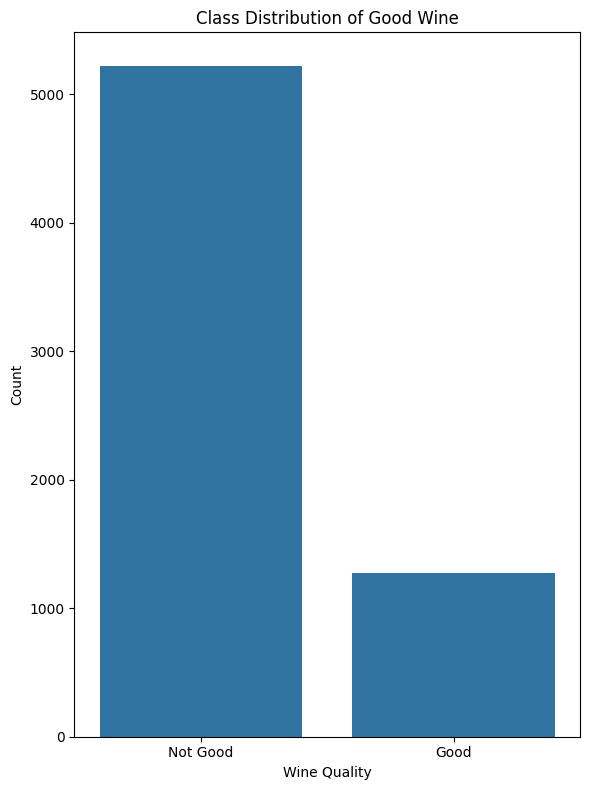

In [168]:
# Take the count of the new column. Since it's binary, it will provide the distribution of Wine Quality.
count = df['good_wine'].value_counts()

plt.figure(figsize=(6,8))
sns.barplot(count)
plt.title('Class Distribution of Good Wine')
plt.xlabel('Wine Quality')
plt.ylabel('Count')
plt.xticks([0,1], labels=['Not Good', 'Good'])
plt.tight_layout()
plt.show()

In [97]:
# Create the features and target from the new table, using the binary target
X = df.drop(['quality','good_wine'], axis=1)
y = df['good_wine']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Baseline Modeling using Decision Tree and Random Forest Classification

In [169]:
# Create a dictionary to assign the performance metrics.
comparison = {}

# Fit the data using a basic Decision Tree
dt = DecisionTreeClassifier(random_state=42)
model = dt.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("\nF1 Score: ", f1_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

comparison['Decision Tree'] = {
    'Accuracy':accuracy_score(y_test, y_pred),
    'F1 Score':f1_score(y_test, y_pred),
    'Precision':precision_score(y_test, y_pred),
    'Recall':recall_score(y_test, y_pred),
    'PR-AUC':average_precision_score(y_test, y_pred)
}

Accuracy Score:  0.8369230769230769

F1 Score:  0.602996254681648

Confusion Matrix: 
 [[927 121]
 [ 91 161]]


In [170]:
# Fit the data using a basic Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
model = rf.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("\nF1 Score: ", f1_score(y_test, y_pred))
print("\nConfusion Matrix: \n", confusion_matrix(y_test, y_pred))

comparison['Random Forest'] = {
    'Accuracy':accuracy_score(y_test, y_pred),
    'F1 Score':f1_score(y_test, y_pred),
    'Precision':precision_score(y_test, y_pred),
    'Recall':recall_score(y_test, y_pred),
    'PR-AUC':average_precision_score(y_test, y_pred)
}

Accuracy Score:  0.8861538461538462

F1 Score:  0.6636363636363637

Confusion Matrix: 
 [[1006   42]
 [ 106  146]]


In [171]:
# Convert the performance metrics dictionary into a dataframe using pandas
comparison_table = pd.DataFrame(comparison)
comparison_table

,Decision Tree,Random Forest
Accuracy,0.836923,0.886154
F1 Score,0.602996,0.663636
Precision,0.570922,0.776596
Recall,0.638889,0.579365
PR-AUC,0.434756,0.531471


**According to the given performance metrics, a basic Random Forest Classifier did significantly better than a basic Decision Tree. Random Forest did better in accuracy and f1 score and significantly better in terms of precision. However, Decision Tree was better in terms of recall. But using average_precision_score, we can find the score of Precision-Recall and it shows Random Forest did better.**

# Hyperparameter Tuning using GridSearchCV

In [116]:
# Create a grid that contains the hyperparameters needed for both the models.
param_grid1 = {
     'max_depth':[None,5,7],
     'min_samples_split':[3,5,7],
     'criterion':['gini','entropy','log_loss']
}
param_grid2 = {
     'n_estimators':[25,50,100],
     'max_depth':[5,7,10],
     'max_features':[None,'sqrt','log2'],
     'bootstrap':[True,False]
}

# Create a cross validation technique using StratifiedKFold to assign to GridSearch
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Find the best Decision Tree Hyperparameters using GridSearch

In [114]:
dt_grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid1, cv=cv, n_jobs=1, scoring='f1')
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 7],
                         'min_samples_split': [3, 5, 7]},
             scoring='f1')

Find the best Random Forest Hyperparameters using GridSearch

In [117]:
rf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid2, cv=cv, n_jobs=1, scoring='f1')
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 7, 10],
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [25, 50, 100]},
             scoring='f1')

In [173]:
# Extract the best parameters and print it.
dt_best = dt_grid.best_estimator_
dt_params = dt_grid.best_params_

print("Best Criterion: ",dt_params['criterion'],
      "\nBest Depth: ",dt_params['max_depth'],
      "\nBest minimum sample: ",dt_params['min_samples_split'],
      "\n\nBest F1 Score:", dt_grid.best_score_)

Best Criterion:  log_loss 
Best Depth:  None 
Best minimum sample:  3 

Best F1 Score: 0.5705098530813656


In [174]:
# Extract the best parameters and print it.
rf_best = rf_grid.best_estimator_
rf_params = rf_grid.best_params_

print("Best number of estimators: ",rf_params['n_estimators'],
      "\nBest Depth: ",rf_params['max_depth'],
      "\nBest maximum features: ",rf_params['max_features'],
      "\nBest bootstrap: ",rf_params['bootstrap'],
      "\n\nBest F1 Score:", rf_grid.best_score_)

Best number of estimators:  25 
Best Depth:  10 
Best maximum features:  None 
Best bootstrap:  True 

Best F1 Score: 0.5945636349947869


# Visualizations of Each Models

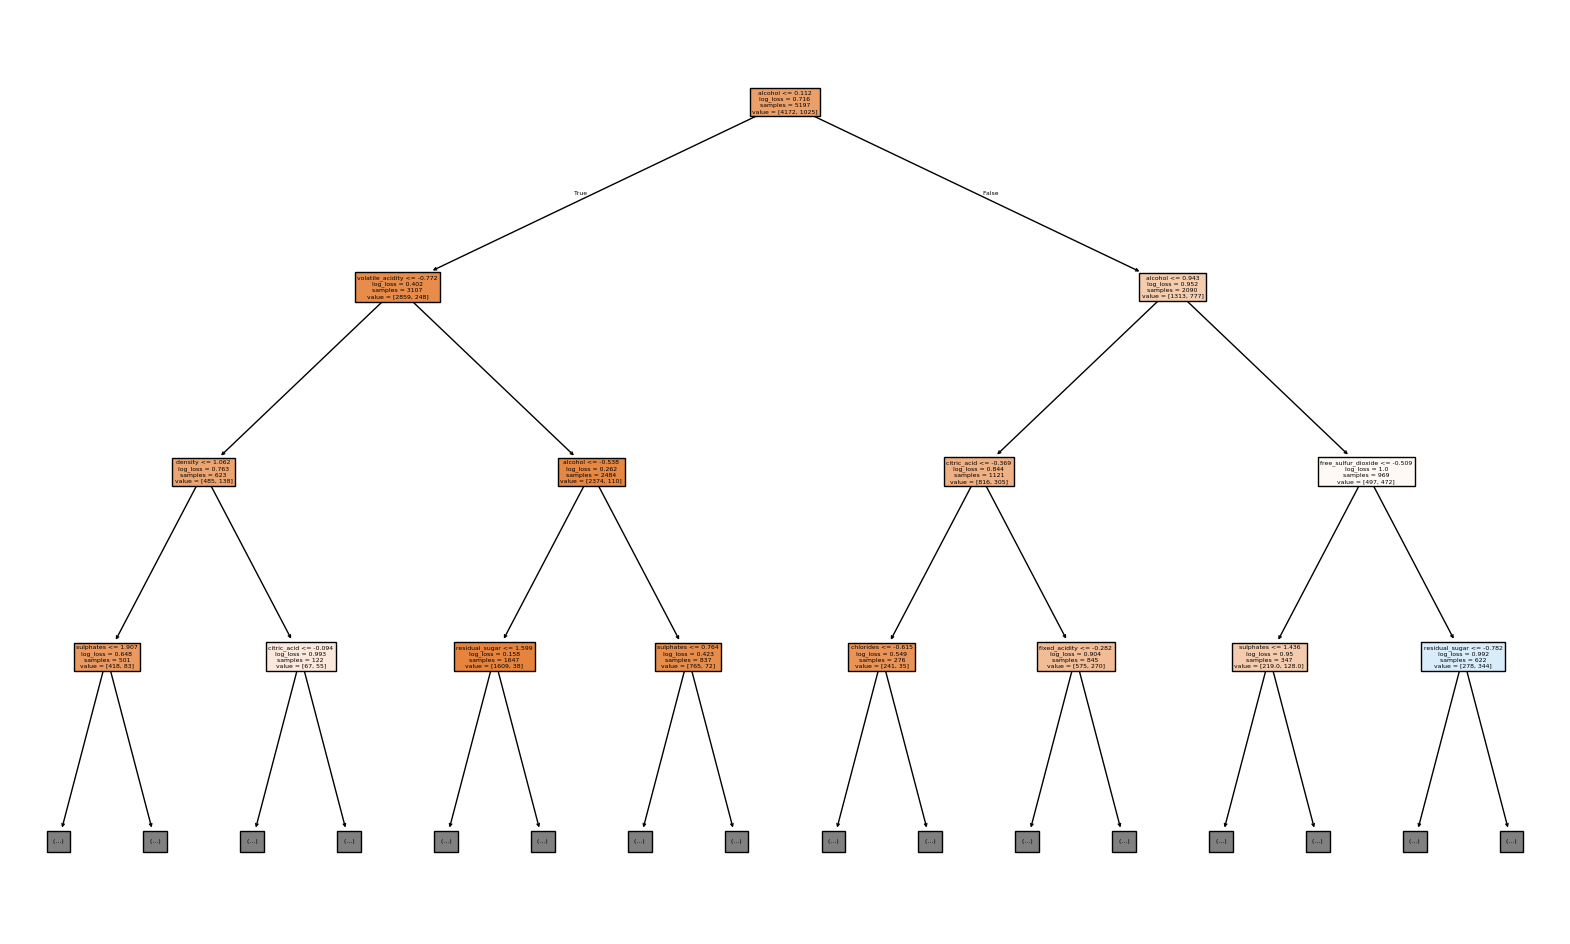

In [175]:
# Visualize the Decision Tree using plot_tree
plt.figure(figsize=(20,12))
plot_tree(dt_grid.best_estimator_, max_depth=3, filled=True, feature_names=X.columns) #max_depth=3 to not crowd the figure
plt.tight_layout
plt.show()

The root node splits using alcohol feature.

Some of the features used as key splits are;
 - alcohol
 - volatile_acidity
 - density
 - citric_acid
 - free_sulfur_dioxide

In [176]:
# Get the importance of each features while using the best RF model
importances = rf_best.feature_importances_
feature_importances = pd.Series(importances, index=X.columns)

feature_importances.sort_values(ascending=False)

,0
alcohol,0.268468
volatile_acidity,0.095039
sulphates,0.087032
free_sulfur_dioxide,0.078162
residual_sugar,0.073204
total_sulfur_dioxide,0.071448
pH,0.069611
chlorides,0.069213
density,0.068374
citric_acid,0.065629


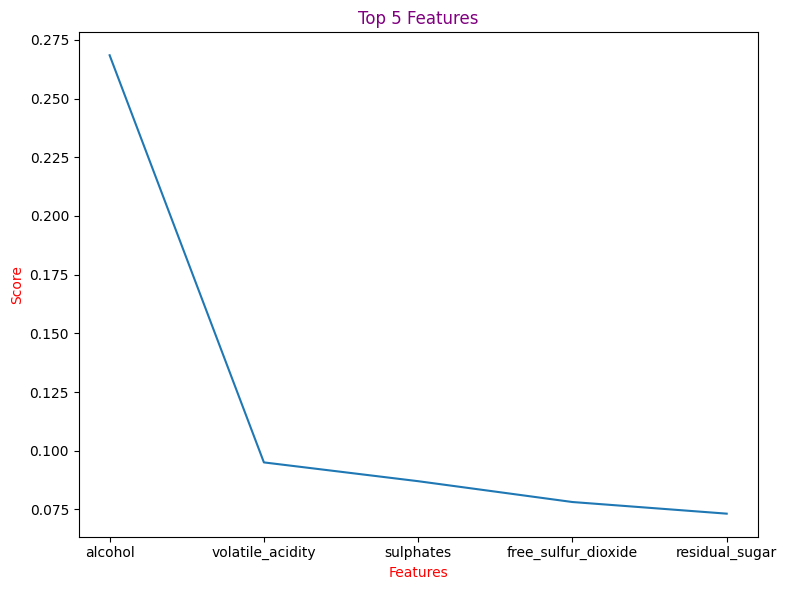

In [177]:
# Visualize the top 5 features
plt.figure(figsize=(8,6))
plt.plot(feature_importances.sort_values(ascending=False)[:5])
plt.title('Top 5 Features', color='purple')
plt.xlabel('Features', color='r')
plt.ylabel('Score', color='r')
plt.tight_layout()
plt.show()

### Are the top features similar to those used in the decision tree?
alcohol and volatile_acidity remains the top 2 in both models but the other features are differently ranked.

### Why might the importance rankings differ?
It could be due to multiple reasons.
- Decision Tree is prone to overfitting and it might cause using wrong features.
- Decision Tree is a single tree while Random Forest uses an ensemble of trees.
- Random Forest uses random features for each bootstrap samples. This can lead to the understanding of each features instead of only trying once.
- Different Hyperparameters used for the two. For example, Decision Tree chose None as the best depth value, which could cause overfitting, while Random Forest chose 10.

In [178]:
start_time = time.time()
y_bestdt_pred = dt_grid.best_estimator_.predict(X_test)
end_time = time.time()

dt_time = (end_time - start_time) *1000   # Multiplied by 1000 to convert seconds to milliseconds

start_time = time.time()
y_bestrf_pred = rf_grid.best_estimator_.predict(X_test)
end_time = time.time()

rf_time = (end_time - start_time) *1000   # Multiplied by 1000 to convert seconds to milliseconds

summary = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Best Accuracy': [accuracy_score(y_test, y_bestdt_pred),
                      accuracy_score(y_test, y_bestrf_pred)],
    'Best F1-score': [dt_grid.best_score_, rf_grid.best_score_],
    'Interpretability level': ['High', 'Medium'],   # Based on a general understanding of the models
    'Training time (in ms)': [dt_time, rf_time]
}

summary_table = pd.DataFrame(summary)
summary_table

,Model,Best Accuracy,Best F1-score,Interpretability level,Training time (in ms)
0,Decision Tree,0.851538,0.570510,High,2.520084
1,Random Forest,0.869231,0.594564,Medium,24.346590


# Conclusion

**Which model would you deploy in a production scenario?**
- For production, Random Forest Classification is better. This is because it provides a higher accuracy and better f1 score compared to a Decision Tree. It shows that Random Forest is a better machine learning model due to the fact that it utilises bootstrap sampling (bagging) to make the model better.


**Which model is easier to explain to non-technical stakeholders?**
- However, a Decision Tree is easier to explain to a non-technical stakeholder as it can be clearly plotted to show how the data is being split, unlike a Random Forest Classifier which can only show what are the important features.


**What are the key trade-offs between interpretability and performance?**
- The above conclusion can lead us to believe that as performance increases, interpretability decreases. This is because a simpler machine learning model such as the Decision Tree can be easier to explain but doesn't perform well on complex tasks. Meanwhile complex models such as Random Forest offer a higher accuracy but is harder to visualize. The model you choose can depend on the task at hand. For cases that require a better prediction such as disease detection, performance is a higher priority, while for presentations to stakeholders, interpretability is important.